In [1]:
import time
import random
import warnings
warnings.filterwarnings("ignore")
from math import *
import operator
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 10000)
import string
from pprint import pprint

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import style
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# load make_blobs to simulate data
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cluster import KMeans
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.svm import SVR

# import libraries for model validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import adjusted_rand_score
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import pearsonr
import statistics

In [2]:
train = pd.read_csv(r"C:\Users\Karan Mehta\Desktop\Hackathon\Machine Hack\Analytics Olympiad\train.csv")

In [3]:
test = pd.read_csv(r"C:\Users\Karan Mehta\Desktop\Hackathon\Machine Hack\Analytics Olympiad\test.csv")

In [4]:
train.head()

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales
0,FDU32,21.027499,Baking Goods,197.352319,OUT046,2004,Small,Tier 2,2689.457781
1,NCT54,21.102371,Meat,148.250214,OUT035,1987,Small,Tier 1,3437.350375
2,FDW08,20.882263,Hard Drinks,205.465010,OUT035,1999,Small,Tier 3,3129.967268
3,FDJ22,21.050435,Starchy Foods,253.417583,OUT046,1996,Small,Tier 1,1306.514376
4,FDF47,21.247876,Baking Goods,240.871039,OUT035,1988,Small,Tier 3,1739.769829


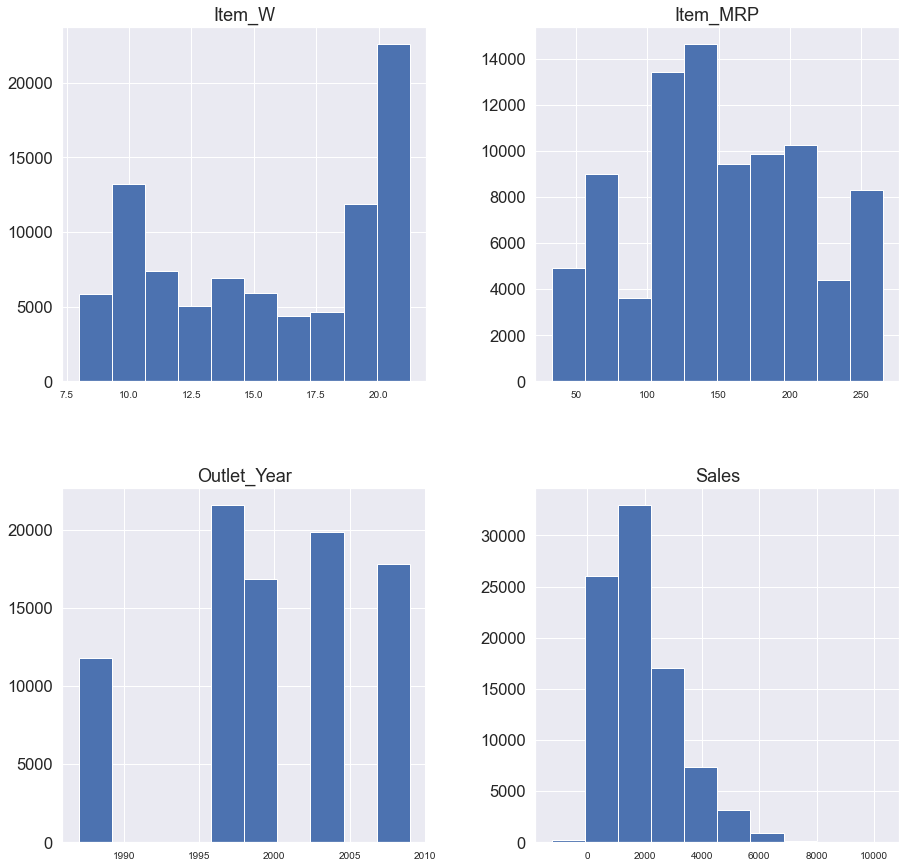

In [5]:
# Histograms:
train.hist(figsize=(15,15), xlabelsize = 10);

Sales is the target variable based on the data, we have predict the sales.

In [6]:
corr = train.corr()
print(corr)

               Item_W  Item_MRP  Outlet_Year     Sales
Item_W       1.000000 -0.022830     0.009632  0.000615
Item_MRP    -0.022830  1.000000    -0.009837  0.014813
Outlet_Year  0.009632 -0.009837     1.000000 -0.035701
Sales        0.000615  0.014813    -0.035701  1.000000


<AxesSubplot:>

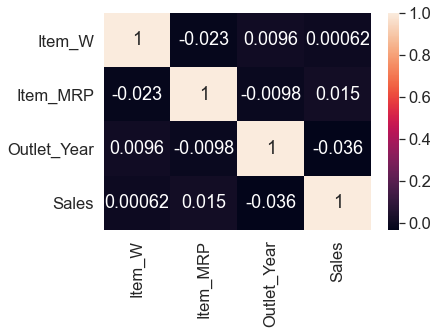

In [7]:
sns.heatmap(train.corr(),annot = True)

In [8]:
train.isna().sum()

Item_ID                 0
Item_W                  0
Item_Type               0
Item_MRP                0
Outlet_ID               0
Outlet_Year             0
Outlet_Size             0
Outlet_Location_Type    0
Sales                   0
dtype: int64

In [9]:
train.describe()

,Item_W,Item_MRP,Outlet_Year,Sales
count,87864.000000,87864.000000,87864.00000,87864.000000
mean,15.591469,151.242943,1999.87063,1911.842120
std,4.364429,59.536366,6.63429,1291.386004
min,7.992700,32.910015,1987.00000,-1229.360345
25%,10.968658,112.423337,1997.00000,959.249675
50%,15.831170,145.581473,1999.00000,1606.307877
75%,19.969936,197.110367,2004.00000,2608.057736
max,21.250000,265.214271,2009.00000,10309.283310


In [10]:
train.columns

Index(['Item_ID', 'Item_W', 'Item_Type', 'Item_MRP', 'Outlet_ID',
       'Outlet_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Sales'],
      dtype='object')

In [11]:
train.Item_ID.value_counts()

FDE11    419
NCE07    362
NCL18    346
NCO06    336
FDD51    329
        ... 
FDI12      2
FDC32      2
FDM02      2
NCM19      1
FDA22      1
Name: Item_ID, Length: 895, dtype: int64

In [12]:
train.Item_Type.value_counts()

Baking Goods             14666
Fruits and Vegetables    14328
Meat                      8099
Snack Foods               7817
Household                 6018
Soft Drinks               5396
Frozen Foods              5129
Canned                    4565
Dairy                     3807
Others                    3688
Breads                    3509
Hard Drinks               3129
Health and Hygiene        2995
Starchy Foods             2974
Seafood                   1107
Breakfast                  637
Name: Item_Type, dtype: int64

In [13]:
train.Outlet_ID.value_counts()

OUT035    24071
OUT046    20850
OUT018    17156
OUT049    13356
OUT013    12431
Name: Outlet_ID, dtype: int64

In [14]:
train.Outlet_Size.value_counts()

Small     48614
Medium    26683
High      12567
Name: Outlet_Size, dtype: int64

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

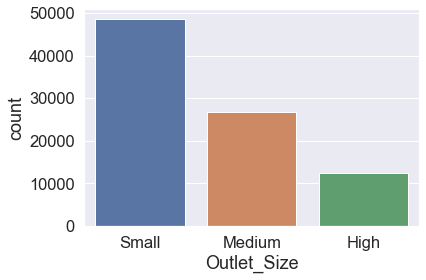

In [15]:
sns.countplot(x = 'Outlet_Size', data = train)

<AxesSubplot:xlabel='Outlet_ID', ylabel='count'>

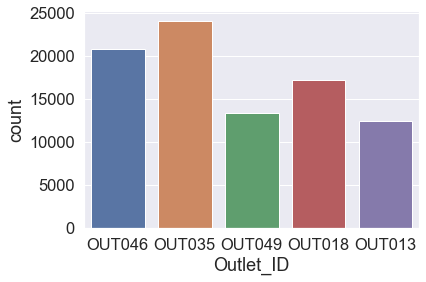

In [16]:
sns.countplot(x = train.Outlet_ID)

<AxesSubplot:xlabel='Outlet_ID', ylabel='count'>

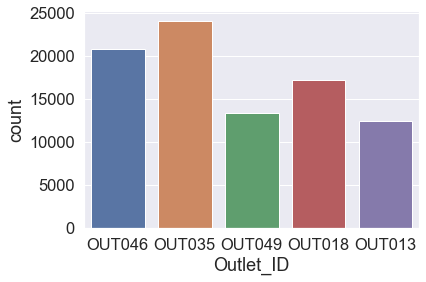

In [17]:
sns.countplot(x = 'Outlet_ID', data = train)

In [18]:
train.Outlet_Location_Type.value_counts()

Tier 1    33567
Tier 3    29044
Tier 2    25253
Name: Outlet_Location_Type, dtype: int64

In [19]:
train["Outlet_Location_Type"]= train.Outlet_Location_Type.map({"Tier 1":1,"Tier 2":2, "Tier 3":3})

In [20]:
test["Outlet_Location_Type"]= test.Outlet_Location_Type.map({"Tier 1":1,"Tier 2":2, "Tier 3":3})

In [21]:
train["Outlet_Location_Type"].head()

0    2
1    1
2    3
3    1
4    3
Name: Outlet_Location_Type, dtype: int64

In [22]:
test["Outlet_Location_Type"].head()

0    3
1    3
2    1
3    2
4    3
Name: Outlet_Location_Type, dtype: int64

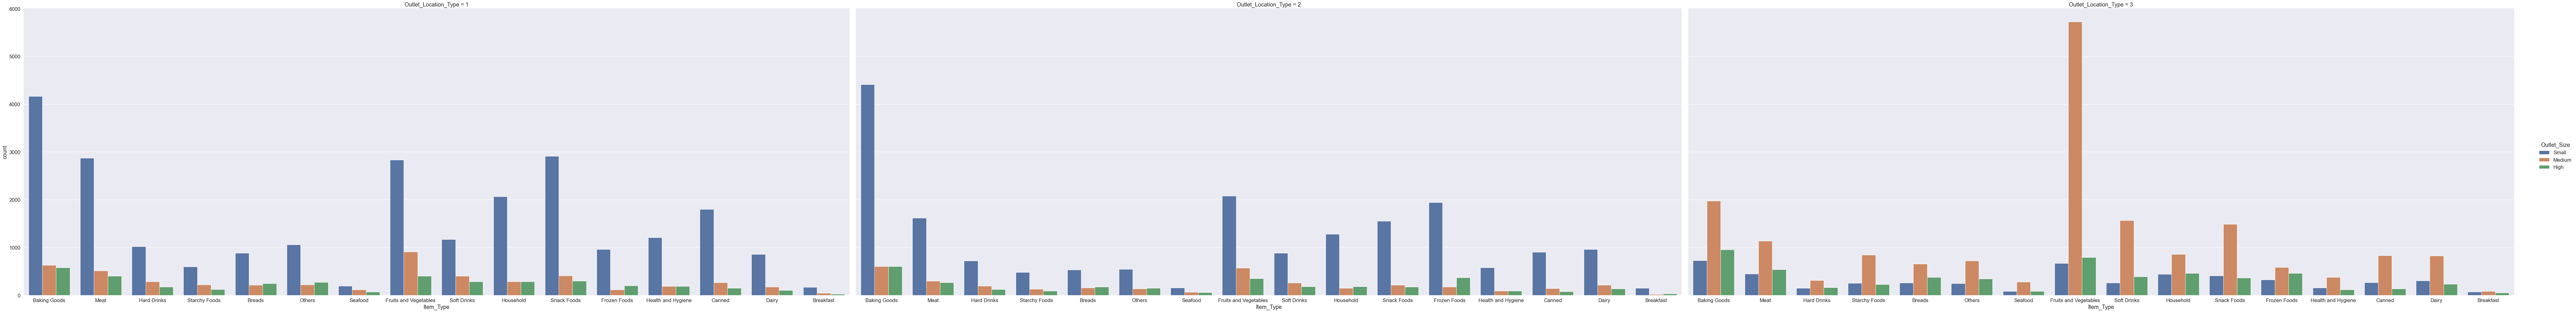

In [23]:
sns.catplot(x = "Item_Type", hue = "Outlet_Size" , col = "Outlet_Location_Type" ,data = train, kind = "count",height=14, aspect=2.7)

{'whiskers': [<matplotlib.lines.Line2D at 0x1de9a6b4e80>,
 'caps': [<matplotlib.lines.Line2D at 0x1de9a6a7850>,
 'boxes': [<matplotlib.lines.Line2D at 0x1de9a6ba7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1de9a693850>],
 'fliers': [<matplotlib.lines.Line2D at 0x1de9a38cca0>],
 'means': []}

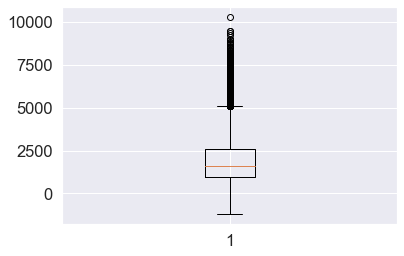

In [24]:
plt.boxplot(train.Sales)

As we can see data don't have any outlier except one for that we have to whether the data(row) is really a outlier or it's a hyperparamter.

In [25]:
q1 = train.quantile(q = 0.25)
q3 = train.quantile(q = 0.75)
iqr = q3 - q1
print("IQR for train:", iqr)

IQR for train: Item_W                     9.001278
Item_MRP                  84.687030
Outlet_Year                7.000000
Outlet_Location_Type       2.000000
Sales                   1648.808061
dtype: float64


The data is in the continues manner and also data is not normaly distributed even there might be one outlier so we will scale down the values by using MinmaxScaler()

In [26]:
train.drop(['Item_ID','Outlet_Year'],axis = 1, inplace = True)

In [27]:
test.drop(['Item_ID','Outlet_Year'],axis = 1, inplace = True)

In [28]:
train.head()

,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Size,Outlet_Location_Type,Sales
0,21.027499,Baking Goods,197.352319,OUT046,Small,2,2689.457781
1,21.102371,Meat,148.250214,OUT035,Small,1,3437.350375
2,20.882263,Hard Drinks,205.465010,OUT035,Small,3,3129.967268
3,21.050435,Starchy Foods,253.417583,OUT046,Small,1,1306.514376
4,21.247876,Baking Goods,240.871039,OUT035,Small,3,1739.769829


In [29]:
test.head()

,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Size,Outlet_Location_Type
0,10.156725,Snack Foods,119.319482,OUT013,High,3
1,10.434425,Household,263.600449,OUT018,High,3
2,11.953589,Health and Hygiene,246.286990,OUT018,High,1
3,14.948546,Dairy,136.200508,OUT046,Medium,2
4,11.080042,Canned,173.145664,OUT018,Medium,3


In [30]:
data_train = pd.get_dummies(train)

In [31]:
data_test = pd.get_dummies(test)

In [32]:
data_train.head()

,Item_W,Item_MRP,Outlet_Location_Type,Sales,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_ID_OUT013,Outlet_ID_OUT018,Outlet_ID_OUT035,Outlet_ID_OUT046,Outlet_ID_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
0,21.027499,197.352319,2,2689.457781,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,21.102371,148.250214,1,3437.350375,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,20.882263,205.465010,3,3129.967268,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,21.050435,253.417583,1,1306.514376,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
4,21.247876,240.871039,3,1739.769829,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [33]:
data_test.head()

,Item_W,Item_MRP,Outlet_Location_Type,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_ID_OUT013,Outlet_ID_OUT018,Outlet_ID_OUT035,Outlet_ID_OUT046,Outlet_ID_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
0,10.156725,119.319482,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
1,10.434425,263.600449,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,11.953589,246.286990,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,14.948546,136.200508,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,11.080042,173.145664,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [34]:
data_train.shape

(87864, 28)

In [35]:
data_test.shape

(37656, 27)

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [37]:
data_train[['Item_W','Item_MRP']]=scaler.fit_transform(data_train[['Item_W','Item_MRP']])

In [38]:
data_train.head()

,Item_W,Item_MRP,Outlet_Location_Type,Sales,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_ID_OUT013,Outlet_ID_OUT018,Outlet_ID_OUT035,Outlet_ID_OUT046,Outlet_ID_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
0,0.983217,0.707875,2,2689.457781,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0.988864,0.496505,1,3437.350375,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.972262,0.742797,3,3129.967268,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.984947,0.949219,1,1306.514376,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
4,0.999840,0.895210,3,1739.769829,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [39]:
data_train.dtypes

Item_W                             float64
Item_MRP                           float64
Outlet_Location_Type                 int64
Sales                              float64
Item_Type_Baking Goods               uint8
Item_Type_Breads                     uint8
Item_Type_Breakfast                  uint8
Item_Type_Canned                     uint8
Item_Type_Dairy                      uint8
Item_Type_Frozen Foods               uint8
Item_Type_Fruits and Vegetables      uint8
Item_Type_Hard Drinks                uint8
Item_Type_Health and Hygiene         uint8
Item_Type_Household                  uint8
Item_Type_Meat                       uint8
Item_Type_Others                     uint8
Item_Type_Seafood                    uint8
Item_Type_Snack Foods                uint8
Item_Type_Soft Drinks                uint8
Item_Type_Starchy Foods              uint8
Outlet_ID_OUT013                     uint8
Outlet_ID_OUT018                     uint8
Outlet_ID_OUT035                     uint8
Outlet_ID_O

In [40]:
X = data_train.drop(columns=['Sales'])
y = data_train['Sales']

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y,train_size =0.75, random_state=0)

In [42]:
X_train.shape , X_val.shape

((65898, 27), (21966, 27))

In [43]:
models = []
models.append(('SVR', SVR()))
models.append(('LR', LinearRegression()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('GB', GradientBoostingRegressor()))
models.append(('XGB', XGBRegressor()))

In [50]:
names = []
rmse = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    #scores.append(accuracy_score(y_val, y_pred))
    rmse.append(round(np.sqrt(mean_squared_error(y_val, y_pred)) **0.5))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'RMSE': rmse})
print(tr_split)

  Name  RMSE
0  SVR    36
1   LR    36
2   DT    43
3   RF    37
4   GB    36
5  XGB    36


As we can see SVR,LR, GB and XGB are giving minimun RMSE then other model.

In [44]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)

gbr.fit(X_train,y_train)

y_pred_gbr = gbr.predict(X_val)

In [45]:
y_pred_gbr

array([1929.9481778 , 1791.56878985, 2100.02478963, ..., 1912.60302892,
       1569.53349965, 2156.5250873 ])

In [46]:
from sklearn.metrics import mean_squared_error
round(np.sqrt(mean_squared_error(y_val, y_pred_gbr)) **0.5)

36

In [47]:
xg = XGBRegressor(random_state=42)

xg.fit(X_train,y_train)

y_pred_xg= xg.predict(X_val)
print(y_pred_xg)
rmse_xg = np.sqrt(mean_squared_error(y_val,y_pred_xg)) ** 0.5

print(rmse_xg)

[1926.2269 1739.7423 2139.5488 ... 1881.0479 1521.273  2196.356 ]
35.89255284270045


In [52]:
y_test_pred_xg = xg.predict(data_test)

In [56]:
test['Sales'] = pd.Series(y_test_pred_xg)

In [57]:
test.head()

,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Size,Outlet_Location_Type,Sales
0,10.156725,Snack Foods,119.319482,OUT013,High,3,4207.741211
1,10.434425,Household,263.600449,OUT018,High,3,3434.671875
2,11.953589,Health and Hygiene,246.286990,OUT018,High,1,3206.523682
3,14.948546,Dairy,136.200508,OUT046,Medium,2,3194.980957
4,11.080042,Canned,173.145664,OUT018,Medium,3,2331.905029


Here I have selected XGBoost has it gives less RMNSE value based on RMSE value it would be a better fit.

Note: We can also select different model and it's on your own interest.